## Data Analysis (part-3)

This notebook also uses the same dataset used in the previous notebook. However, you can download the data from [here](https://www.kaggle.com/c/titanic/data).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Survived'] = df['Survived'].astype(np.float64)

In [4]:
test = pd.DataFrame(np.random.randint(0,10,25).reshape(5,5), columns=[list('12345')])
test

,1,2,3,4,5
0,1,6,1,1,7
1,9,9,4,5,6
2,6,3,9,8,2
3,9,2,9,3,9
4,7,8,2,6,0


In [5]:
test = test.astype(np.float32)
test

,1,2,3,4,5
0,1.0,6.0,1.0,1.0,7.0
1,9.0,9.0,4.0,5.0,6.0
2,6.0,3.0,9.0,8.0,2.0
3,9.0,2.0,9.0,3.0,9.0
4,7.0,8.0,2.0,6.0,0.0


In [6]:
test.apply(np.sin)

,1,2,3,4,5
0,0.841471,-0.279415,0.841471,0.841471,0.656987
1,0.412118,0.412118,-0.756802,-0.958924,-0.279415
2,-0.279415,0.141120,0.412118,0.989358,0.909297
3,0.412118,0.909297,0.412118,0.141120,0.412118
4,0.656987,0.989358,0.909297,-0.279415,0.000000


In [7]:
for i in test.columns:
    for j in test.index:
        test.iloc[j][i] = np.sin(test.iloc[j][i])
        
test

,1,2,3,4,5
0,0.841471,-0.279415,0.841471,0.841471,0.656987
1,0.412118,0.412118,-0.756802,-0.958924,-0.279415
2,-0.279415,0.141120,0.412118,0.989358,0.909297
3,0.412118,0.909297,0.412118,0.141120,0.412118
4,0.656987,0.989358,0.909297,-0.279415,0.000000


###### Working with bigger dataframe to show vectorized performance

In [8]:
test = pd.DataFrame(np.random.randint(0,100,81).reshape(9,9), columns=[list('123456789')]).astype(np.float32)
test

,1,2,3,4,5,6,7,8,9
0,14.0,15.0,78.0,32.0,55.0,51.0,88.0,56.0,8.0
1,64.0,36.0,96.0,55.0,41.0,99.0,13.0,84.0,86.0
2,3.0,91.0,26.0,76.0,4.0,99.0,93.0,62.0,58.0
3,27.0,10.0,16.0,88.0,50.0,18.0,45.0,16.0,88.0
4,95.0,37.0,61.0,34.0,49.0,37.0,39.0,44.0,90.0
5,39.0,47.0,84.0,18.0,94.0,20.0,79.0,28.0,83.0
6,53.0,18.0,9.0,27.0,87.0,61.0,27.0,58.0,25.0
7,92.0,70.0,47.0,77.0,81.0,18.0,52.0,31.0,36.0
8,52.0,49.0,25.0,87.0,94.0,60.0,23.0,54.0,14.0


In [9]:
%%timeit
test.apply(np.sin)

162 µs ± 2.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
test

,1,2,3,4,5,6,7,8,9
0,14.0,15.0,78.0,32.0,55.0,51.0,88.0,56.0,8.0
1,64.0,36.0,96.0,55.0,41.0,99.0,13.0,84.0,86.0
2,3.0,91.0,26.0,76.0,4.0,99.0,93.0,62.0,58.0
3,27.0,10.0,16.0,88.0,50.0,18.0,45.0,16.0,88.0
4,95.0,37.0,61.0,34.0,49.0,37.0,39.0,44.0,90.0
5,39.0,47.0,84.0,18.0,94.0,20.0,79.0,28.0,83.0
6,53.0,18.0,9.0,27.0,87.0,61.0,27.0,58.0,25.0
7,92.0,70.0,47.0,77.0,81.0,18.0,52.0,31.0,36.0
8,52.0,49.0,25.0,87.0,94.0,60.0,23.0,54.0,14.0


In [11]:
%%timeit
for i in test.columns:
    for j in test.index:
        test.iloc[j][i] = np.sin(test.iloc[j][i])

28.1 ms ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [153]:
27.8*1000/162

171.60493827160494

###### Sorting

In [15]:
df.sort_values(['Fare'], kind='quicksort', ascending=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S


In [162]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


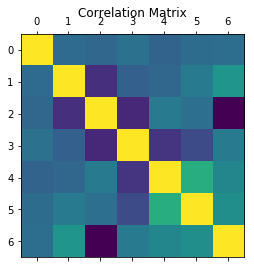

In [170]:
plt.matshow(df.corr())
plt.title('Correlation Matrix')

In [17]:
name = df['Name']

In [18]:
df[name.str.startswith('C')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.00,0,0,A./5. 2152,8.0500,NaN,S
67,68,0.0,3,"Crease, Mr. Ernest James",male,19.00,0,0,S.P. 3464,8.1583,NaN,S
73,74,0.0,3,"Chronopoulos, Mr. Apostolos",male,26.00,1,0,2680,14.4542,NaN,C
78,79,1.0,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
